In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
df = pd.read_csv('0910 착과수_normalized.csv')

In [14]:
len(df.columns)

16

In [15]:
df.columns

Index(['STRG_DT', 'FRST_TREE_CNT', 'PFBS_NTRO_CBDX_CTRN', 'EXTN_TPRT',
       'DWP_TPRT', 'ABSLT_HMDT', 'STRTN_WATER', 'EXTN_SRQT', 'WATER_LACK_VL',
       'SPL_TPRT_1', 'HTNG_TPRT_1', 'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',
       'SKLT_OPDR_RATE_1_RIGHT', 'AVE_INNER_TPRT_1_2', 'GDD'],
      dtype='object')

In [16]:
df_drop = df.copy()

#16개 열로 진행
variables = df_drop[['STRTN_WATER', 'DWP_TPRT', 'AVE_INNER_TPRT_1_2','PFBS_NTRO_CBDX_CTRN', 'EXTN_TPRT',\
       'ABSLT_HMDT', 'EXTN_SRQT', 'WATER_LACK_VL',\
       'SPL_TPRT_1', 'HTNG_TPRT_1', 'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',\
       'SKLT_OPDR_RATE_1_RIGHT', 'GDD']]


# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = variables.columns
vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

print("VIF\n", vif_data)


C:\Users\80700\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF
                    feature        VIF
0              STRTN_WATER        inf
1                 DWP_TPRT  67.082682
2       AVE_INNER_TPRT_1_2  82.065696
3      PFBS_NTRO_CBDX_CTRN   1.575386
4                EXTN_TPRT   9.021359
5               ABSLT_HMDT        inf
6                EXTN_SRQT   2.645807
7            WATER_LACK_VL        inf
8               SPL_TPRT_1   3.647509
9              HTNG_TPRT_1   3.371022
10              SPL_TPRT_2   2.199320
11      AVE_INNER_HMDT_1_2  10.116172
12  SKLT_OPDR_RATE_1_RIGHT   2.298154
13                     GDD   1.292036


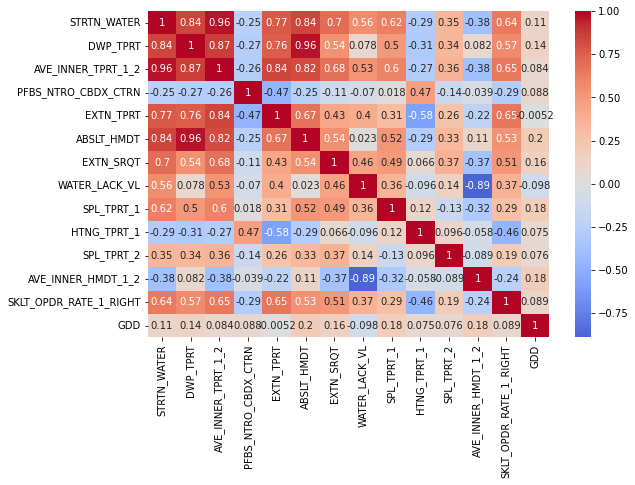

In [17]:
# 상관관계 행렬 계산
correlation_matrix = variables.corr()

# 히트맵 그리기
plt.figure(figsize=(9, 6))  # 그림 크기 조절
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
#plt.title('상관관계 히트맵')
plt.show()


In [18]:
correlation = df['ABSLT_HMDT'].corr(df['STRTN_WATER'])
correlation2 = df['ABSLT_HMDT'].corr(df['WATER_LACK_VL'])
correlation3 = df['STRTN_WATER'].corr(df['WATER_LACK_VL'])
correlation4 = df['ABSLT_HMDT'].corr(df['DWP_TPRT'])
print(correlation)
print(correlation2)
print(correlation3)
print(correlation4)

0.8432241308413129
0.023413452502187102
0.5571575749556331
0.9635248598662627


In [19]:
df_drop = df.copy()

# 1차로 뺀 거
list = ['STRTN_WATER', 'DWP_TPRT', 'AVE_INNER_TPRT_1_2'] #상관관계 높은 값 삭제

#STRTN_WATER, DWP_TPRT, AVE_INNER_TPRT_1_2 빼고 남은 13개 열로 진행(착과수 날짜 빼면 11개)
variables = df_drop[['PFBS_NTRO_CBDX_CTRN', 'EXTN_TPRT',\
       'ABSLT_HMDT', 'EXTN_SRQT', 'WATER_LACK_VL',\
       'SPL_TPRT_1', 'HTNG_TPRT_1', 'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',\
       'SKLT_OPDR_RATE_1_RIGHT', 'GDD']]


# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = variables.columns
vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

print("VIF\n", vif_data)


VIF
                    feature       VIF
0      PFBS_NTRO_CBDX_CTRN  1.505096
1                EXTN_TPRT  4.365249
2               ABSLT_HMDT  5.926118
3                EXTN_SRQT  2.635573
4            WATER_LACK_VL  7.116903
5               SPL_TPRT_1  3.519787
6              HTNG_TPRT_1  3.001438
7               SPL_TPRT_2  2.153983
8       AVE_INNER_HMDT_1_2  5.982560
9   SKLT_OPDR_RATE_1_RIGHT  2.274710
10                     GDD  1.185040


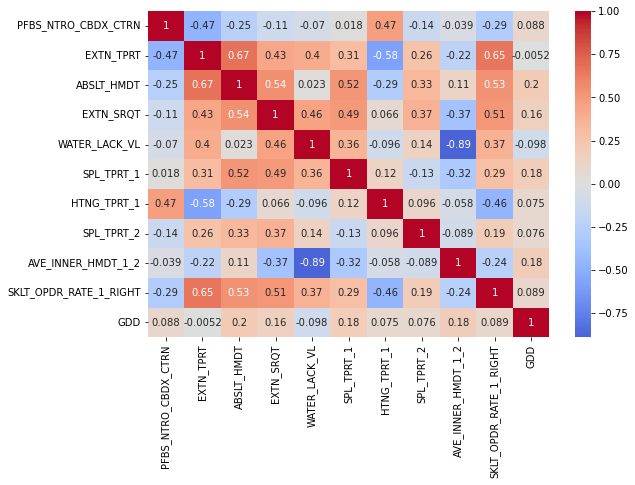

In [20]:
# 상관관계 행렬 계산
correlation_matrix = variables.corr()

# 히트맵 그리기
plt.figure(figsize=(9, 6))  # 그림 크기 조절
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
#plt.title('상관관계 히트맵')
plt.show()


In [21]:
# EXTN_TPRT, ABSLT_HMDT, EXTN_SRQT, WATER_LACK_VL 삭제 (13개 열->9개 열)
df_drop = df.copy()

variables = df_drop[['PFBS_NTRO_CBDX_CTRN',\
       'SPL_TPRT_1', 'HTNG_TPRT_1', 'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2',\
       'SKLT_OPDR_RATE_1_RIGHT', 'GDD']]


# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = variables.columns
vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

print("최종 VIF\n", vif_data)


최종 VIF
                   feature       VIF
0     PFBS_NTRO_CBDX_CTRN  1.378846
1              SPL_TPRT_1  1.461208
2             HTNG_TPRT_1  1.883351
3              SPL_TPRT_2  1.257776
4      AVE_INNER_HMDT_1_2  1.281350
5  SKLT_OPDR_RATE_1_RIGHT  1.792745
6                     GDD  1.156661


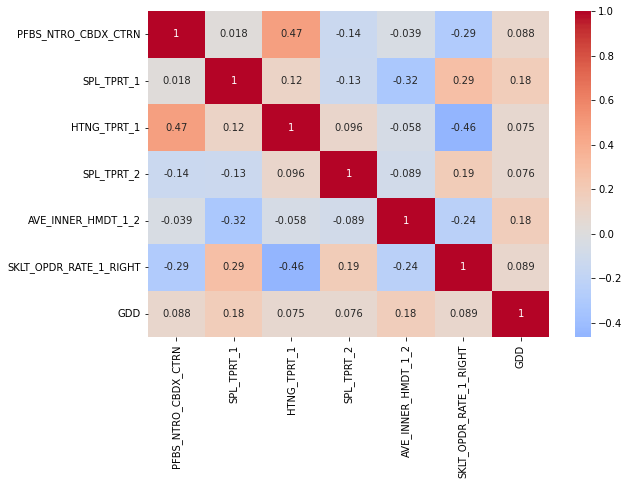

In [22]:
# 상관관계 행렬 계산
correlation_matrix = variables.corr()

# 히트맵 그리기
plt.figure(figsize=(9, 6))  # 그림 크기 조절
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()